In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

rawdatain = pd.read_excel('../Data/Clifton/CliftonRawData.xlsx')

In [7]:
display(rawdatain.head())

Submitted                  CreatedAt vasString painStatusString  \
0       YES  2015-12-23 03:36:11 +0000       0.9    same as usual   
1       YES  2015-12-22 07:09:07 +0000       0.6    same as usual   
2       YES  2015-12-21 06:47:07 +0000         1    same as usual   
3        NO  2015-12-18 23:21:15 +0000         0     Undetermined   
4       YES  2015-12-18 15:40:00 +0000       0.8    same as usual   

                                        actionString painAlertString  \
0  Took Oxycodone,Took Tylenol,Got rest,Used rela...              NO   
1  Took Tylenol,Took Oxycodone,Drank a glass of f...              NO   
2  Took Oxycodone,Took Tylenol,Drank a glass of f...              NO   
3  Took Oxycodone,Took Tylenol,Drank a glass of f...             -99   
4  Took Oxycodone,Took Tylenol,Drank a glass of f...              NO   

     ParticipantID provider  baselineVAS  \
0  Participant1001      YES          3.4   
1  Participant1001      YES          3.4   
2  Participant1001      YES          3.4   
3  Participant1001      YES        -99.0   
4  Participant1001      YES          3.4   

                           painReportPatientLanguage  ... Q33  \
0  I had pain, pain crisis, cold symptoms, fatigu...  ... -99   
1  I had pain crisis, pain, cold symptoms. My pai...  ... -99   
2  I had pain crisis, pain, cold symptoms, throat...  ... -99   
3  I had no symptoms. My pain was 0 on a scale of...  ... -99   
4  I had pain crisis, cold symptoms, low mood, fa...  ... -99   

                                        painLocation  Q35 Q36 Q37 Q38  \
0                                   Back,Arms,Ankles  0,0   0 -99 -99   
1                              Head,Back,Arms,Ankles  0,0   0 -99 -99   
2  Throat,other locations,Back,Arms,Knee joints,A...  0,0   0 -99 -99   
3                                               none  0,0   0 -99 -99   
4                       Back,Arms,Knee joints,Ankles  0,0   0 -99 -99   

  Institution Gender   Dx     MonitoringTxOrSx  
0           B    -99  -99  Monitoring Symptoms  
1           B    -99  -99  Monitoring Symptoms  
2           B    -99  -99  Monitoring Symptoms  
3           B    -99  -99  Monitoring Symptoms  
4           B    -99  -99  Monitoring Symptoms  

[5 rows x 57 columns]

Text(0, 0.5, 'Pain score recorded')

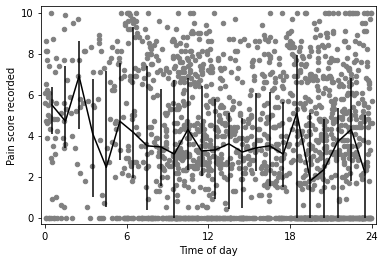

In [4]:
datetimes = pd.to_datetime(rawdatain['CreatedAt'], format='%Y-%m-%d %H:%M:%S +0000')
pains = rawdatain[['ParticipantID', 'vasString']]
simple_df = pd.concat([pains, datetimes], axis=1)
simple_df['vasString'] = pd.to_numeric(simple_df['vasString'], errors='coerce')
simple_df.dropna(how='any')
simple_df['Days'] = simple_df['CreatedAt'].dt.hour \
    +simple_df['CreatedAt'].dt.minute/60 \
    +simple_df['CreatedAt'].dt.second/3600
simple_df['Days'] = np.mod(simple_df['Days']-6, 24)
plt.scatter(simple_df['Days'], simple_df['vasString'], color='gray', s=20)
i = 0
t_range = np.arange(0, 24, 1)
med = np.zeros((len(t_range),))
top = np.zeros((len(t_range),))
bot = np.zeros((len(t_range),))
std = np.zeros((len(t_range),))
mean = np.zeros((len(t_range),))
for t in t_range:
    inds = np.where(np.logical_and(simple_df['Days']>=t, simple_df['Days'] <t+0.5))[0]
    pain = simple_df['vasString'].iloc[inds]
#     std[i] = np.nanstd(pain)
#     mean[i] = np.nanmean(pain)
    bot[i] = np.nanpercentile(pain, 25)
    med[i] = np.nanpercentile(pain, 50)
    top[i] = np.nanpercentile(pain, 75)
    i += 1
plt.errorbar(t_range+t_range[1]/2, med, 
             yerr=np.vstack([(med-bot), (top-med)]), 
             linewidth=1.5, color='black')
plt.xlim([-0.3, 24.3])
plt.xticks([0, 6, 12, 18, 24])
plt.ylim([-0.3, 10.3])
plt.xlabel('Time of day')
plt.ylabel('Pain score recorded')

In [62]:
np.vstack((bot, top)).shape

(2, 48)